In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

path = os.listdir('D:/miniproj/Training')
classes = {'glioma':0, 'meningioma':1, 'notumor':2,'pituitary':3 }

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:/miniproj/Training'

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'D:/miniproj/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

np.unique(Y)

array([0, 1, 2, 3])

In [ ]:
pd.Series(Y).value_counts()

3    827
0    826
1    822
2    395
Name: count, dtype: int64

In [ ]:
X.shape, X_updated.shape

((2870, 200, 200), (2870, 40000))

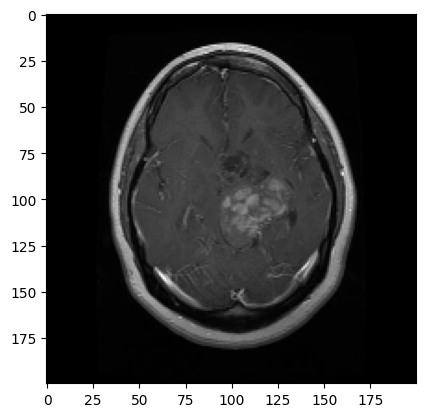

In [ ]:
plt.imshow(X[0], cmap='gray')

Data

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

Scaling

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Feature Selection

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(2296, 40000) (574, 40000)


Model Train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.9982578397212544
Testing Score: 0.789198606271777


In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.938588850174216
Testing Score: 0.818815331010453


prediction

In [ ]:
pred = sv.predict(xtest)

In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  0,   1,   9,  11,  15,  18,  23,  28,  34,  37,  54,  55,  57,
         65,  66,  67,  72,  79,  82,  84,  87,  94,  98, 110, 116, 117,
        118, 119, 123, 133, 148, 184, 185, 187, 190, 191, 193, 194, 196,
        201, 204, 206, 208, 209, 211, 214, 219, 225, 229, 233, 236, 239,
        260, 261, 266, 272, 273, 274, 278, 288, 300, 304, 305, 308, 318,
        319, 320, 339, 349, 353, 361, 365, 374, 387, 393, 403, 416, 420,
        422, 423, 424, 432, 439, 444, 453, 457, 470, 472, 473, 475, 486,
        489, 507, 508, 512, 522, 526, 528, 529, 532, 539, 543, 557, 568]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  104
3 3


Test Model

In [ ]:
dec = {0:'glioma', 1:'meningioma', 2:'notumor',3:'pituitarytumor'}

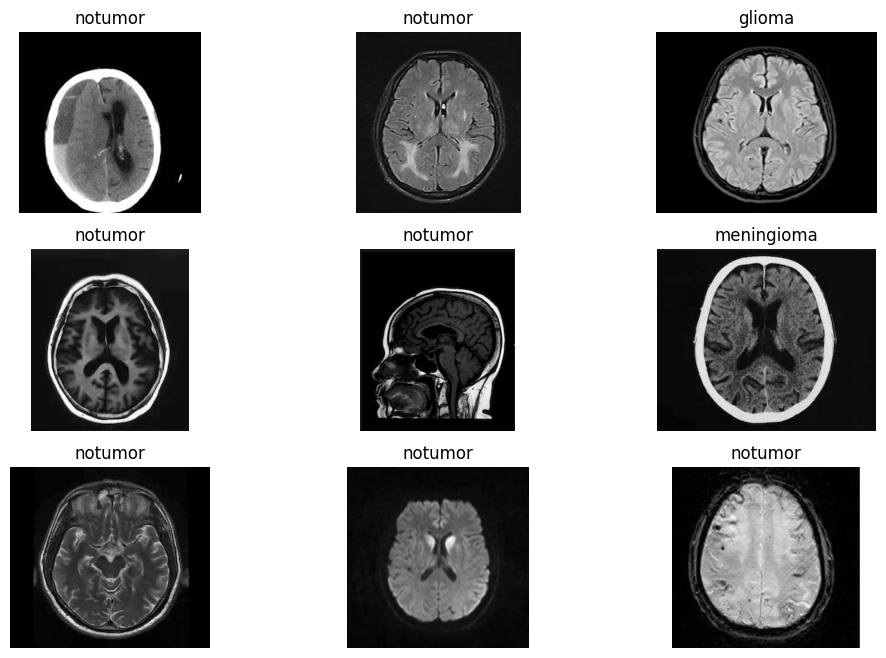

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('D:/miniproj/Testing/')
c=1
for i in os.listdir('D:/miniproj/Testing/notumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('D:/miniproj/Testing/notumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1